In [2]:
import numpy as np
import matplotlib.pyplot as plt

$$ \min_x \frac12 x^{\top}A x - b^\top x $$

$$ \kappa = \frac{L}{\mu}$$

If function is quadratic and convex, $L = \lambda_{\max}(A)$ and $\mu = \lambda_{\min}(A)$

In [3]:
n = 100
A = np.random.randn(n, n) #матрица случнорм распр
A = A.T @ A + np.eye(n) #делаем ее симметричной 
b = np.random.randn(n) #случнорм в-р

In [4]:
eigvals = np.linalg.eigvalsh(A)
print(max(eigvals) / min(eigvals)) #число обусловленности каппа

362.6207139944718


In [5]:
min(eigvals)

1.0000034765408692

In [6]:
tol = 1e-5 #критерий остановки по размеру градиента
max_iter = 100000 
alpha = 1e-3
alpha_star = 1 / max(eigvals) #пока не трогаем 

In [7]:
x0 = np.random.randn(n) # Инициализируем случайню точку для старта алгоритма 

In [8]:
def grad(x):
    return A @ x - b # тк А симметрична


def gradient_descent(grad, x0, maxiter, tol, alpha):
    x = x0.copy()
    conv = [x0.copy()]
    for i in range(maxiter):
        g = grad(x)
        if np.linalg.norm(g) < tol:
            break
        x = x - alpha * g
        conv.append(x.copy())
    return x, conv

In [9]:
x_gd, conv_gd = gradient_descent(grad, x0, max_iter, tol, alpha)

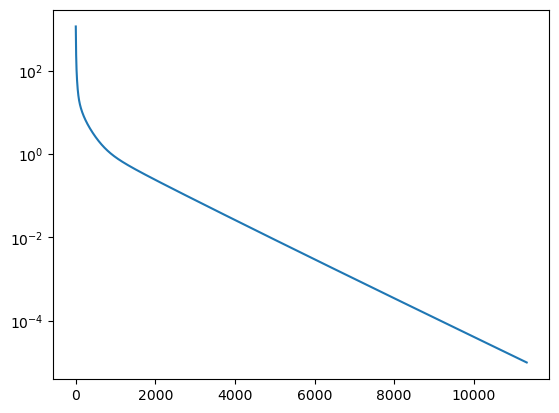

In [25]:
plt.plot([np.linalg.norm(grad(x)) for x in conv_gd])
plt.yscale("log")

In [26]:
kappa = max(eigvals) / min(eigvals)
q = (kappa - 1) / (kappa + 1)
print(q)
g_norm = np.array([np.linalg.norm(grad(x)) for x in conv_gd])
print(g_norm[1:] / g_norm[:-1])

0.9945205704499226
[0.7882128  0.80160751 0.8151827  ... 0.99893836 0.99893836 0.99893837]


In [27]:
x_gd_L, conv_gd_L = gradient_descent(grad, x0, max_iter, tol, alpha_star)

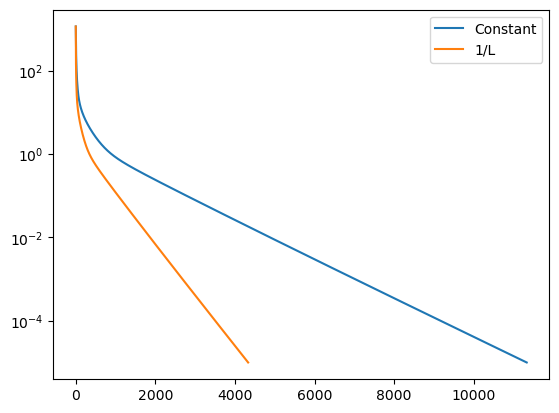

In [29]:
plt.plot([np.linalg.norm(grad(x)) for x in conv_gd], label="Constant")
plt.plot([np.linalg.norm(grad(x)) for x in conv_gd_L], label="1/L")
plt.legend()
plt.yscale("log")

In [30]:
def armijo_rule(h, grad, x, f):
    alpha = 1
    beta = 0.1
    fval = f(x)
    h_dot_grad = h @ grad
    while f(x + alpha * h) >= fval + beta * alpha * h_dot_grad:
        alpha *= 0.5

    return alpha

In [34]:
def gradient_descent_adaptive(grad, x0, maxiter, tol, adaptive_stepsize):
    x = x0.copy()
    conv = [x0.copy()]
    for i in range(maxiter):
        g = grad(x)
        alpha = adaptive_stepsize(-g, grad(x), x, lambda x: 0.5 * x @ A @ x - b @ x)
        if np.linalg.norm(g) < tol:
            break
        x = x - alpha * g
        conv.append(x.copy())
    return x, conv

In [35]:
x_gd_adaptive, conv_gd_adaptive = gradient_descent_adaptive(lambda x: A @ x - b, x0, max_iter, tol, armijo_rule)

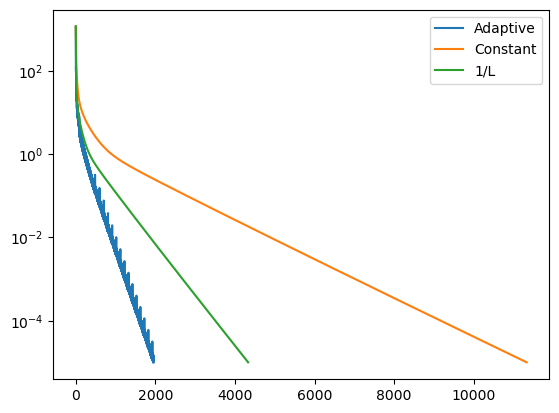

In [33]:
plt.plot([np.linalg.norm(grad(x)) for x in conv_gd_adaptive], label="Adaptive")
plt.plot([np.linalg.norm(grad(x)) for x in conv_gd], label="Constant")
plt.plot([np.linalg.norm(grad(x)) for x in conv_gd_L], label="1/L")
plt.legend()
plt.yscale("log")